In this example, we illustrate the calculation of the confidence intervals for $\sigma$ when the data is sampled from the normal distribution $N(\mu, \sigma^2)$ and the population mean $mu$ is known.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2


Here is how we calculate $\chi^2_{\alpha/2}$ and  $\chi^2_{1 - \alpha/2}$.


 (The notation is a bit different from the notation in the Wackerly - Mendenhall - Scheaffer (WMS) textbook. Here we require that
$P(T \leq \chi^2_{\alpha/2}) = \alpha/2$. So, $\chi^2_{\alpha/2}$ and  $\chi^2_{1 - \alpha/2}$ switch places comparative to the notation in the textbook.)

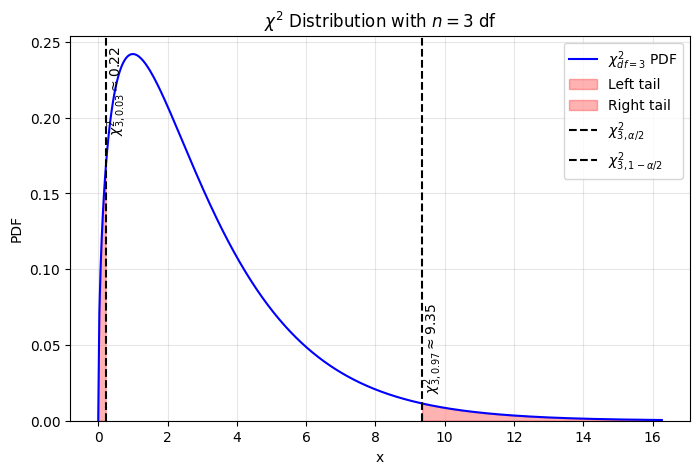

In [ ]:
def plot_chi2_critical_values(n, alpha=0.05):
    """
    Plots the chi-square PDF for n degrees of freedom,
    and highlights the critical values for alpha/2 and 1-alpha/2.

    Parameters
    ----------
    n : int
        Degrees of freedom.
    alpha : float, optional
        Significance level (default=0.05).
    """
    # Define the critical points
    left_crit = chi2.ppf(alpha / 2, n)
    right_crit = chi2.ppf(1 - alpha / 2, n)

    # Create an x-grid to plot the chi-square PDF
    x_min = 0
    # To capture the tail well, go a bit beyond the right critical value
    x_max = chi2.ppf(0.999, n)  # 99.9th percentile or use something bigger for safety
    x = np.linspace(x_min, x_max, 500)

    # Chi-square PDF values
    y = chi2.pdf(x, n)

    # Create the plot
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, 'b-', label='$\chi^2_{df=%d}$ PDF' % n)

    # Fill the left tail: x < left_crit
    x_left = np.linspace(x_min, left_crit, 200)
    y_left = chi2.pdf(x_left, n)
    plt.fill_between(x_left, y_left, color='red', alpha=0.3, label='Left tail')

    # Fill the right tail: x > right_crit
    x_right = np.linspace(right_crit, x_max, 200)
    y_right = chi2.pdf(x_right, n)
    plt.fill_between(x_right, y_right, color='red', alpha=0.3, label='Right tail')

    # Draw vertical lines at critical values
    plt.axvline(left_crit, color='k', linestyle='--', label=f'$\\chi^2_{{{n},\\alpha/2}}$')
    plt.axvline(right_crit, color='k', linestyle='--', label=f'$\\chi^2_{{{n},1-\\alpha/2}}$')

    # Annotations for the critical points
    plt.text(left_crit, chi2.pdf(left_crit, n)*1.1,
             f'  $\\chi^2_{{{n},{alpha/2:.2f}}}\\approx{left_crit:.2f}$',
             rotation=90, verticalalignment='bottom')
    plt.text(right_crit, chi2.pdf(right_crit, n)*1.1,
             f'  $\\chi^2_{{{n},{1-alpha/2:.2f}}}\\approx{right_crit:.2f}$',
             rotation=90, verticalalignment='bottom')

    # Labels, legend, and title
    plt.title(r"$\chi^2$ Distribution with $n=%d$ df" % n)
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.ylim(bottom=0)  # make sure y-axis starts at 0
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)

    # Show the plot
    plt.show()


# Example usage for n=30, alpha=0.05
plot_chi2_critical_values(n=3, alpha=0.05)

Now we create a function that will calculate the confidence inteval for the standard deviation $\sigma$.

In [ ]:
def confidence_interval_sd_known_mean(data, mu, alpha=0.05):
    """
    Computes the (1-alpha)*100% confidence interval for the population standard deviation
    when the population mean is known and the data are normally distributed.

    Parameters:
    -----------
    data  : array-like of shape (n,)
            Sample observations.
    mu    : float
            Known population mean.
    alpha : float, default=0.05
            Significance level for a (1-alpha)*100% confidence interval.

    Returns:
    --------
    (lower_bound, upper_bound) : tuple of floats
        The lower and upper bounds of the confidence interval for the standard deviation.
    """
    n = len(data)

    # Sum of squared deviations from the known mean
    sum_of_squares = np.sum((data - mu)**2)

    # Variance estimator (because mu is known, we divide by n, not n-1)
    var_hat = sum_of_squares / n

    # Compute chi-square critical values
    chi2_lower = chi2.ppf(alpha/2, n)       # chi-square quantile for alpha/2
    chi2_upper = chi2.ppf(1 - alpha/2, n)   # chi-square quantile for 1 - alpha/2

    # Compute the confidence interval for the *variance*
    var_lower_bound = (n * var_hat) / chi2_upper
    var_upper_bound = (n * var_hat) / chi2_lower

    # CI for the *standard deviation* = sqrt of variance CI endpoints
    sd_lower_bound = np.sqrt(var_lower_bound)
    sd_upper_bound = np.sqrt(var_upper_bound)

    return (sd_lower_bound, sd_upper_bound)


#np.random.seed(42)  # for reproducibility

# True (known) mean and true standard deviation
true_mean = 5.0
true_sigma = 2.0
sample_size = 2

# Generate synthetic data from N(true_mean, true_sigma^2)
data = np.random.normal(loc=true_mean, scale=true_sigma, size=sample_size)

# Compute 95% confidence interval for the standard deviation
ci_lower, ci_upper = confidence_interval_sd_known_mean(data, mu=true_mean, alpha=0.05)

# Print out results
# Note: We use ddof=0 for sample std since mean is known
# (this matches dividing by n in var_hat).
sd_estimate = np.sqrt(np.var(data, ddof=0))
print(f"Estimated standard deviation (mu known) = {sd_estimate:.4f}")
print(f"95% CI for the standard deviation: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"True standard deviation = {true_sigma:.4f}")


Estimated standard deviation (mu known) = 2.4540
95% CI for the standard deviation: [1.4340, 17.3098]
True standard deviation = 2.0000
